In [1]:
import pandas as pd
import plotly.graph_objects as go
from ex_utils.config.quality_metrics import qm_names

from ex_utils.share import ex_path
import matplotlib.pyplot as plt

import japanize_matplotlib


ModuleNotFoundError: No module named 'ex_utils.config.quality_metrics'

In [ ]:
dataset_names = ["les_miserables", "1138_bus", "USpowerGrid"]
data_names_map = dict(
    item
    for item in zip(
        ["les_miserables", "1138_bus", "USpowerGrid"],
        ["lesmis", "1138-bus", "USpowerGrid"],
    )
)

gdf = pd.DataFrame()

dns = ["les_miserables", "1138_bus", "USpowerGrid"]
for dn in dns:
    pdf = pd.read_pickle(
        ex_path.joinpath(f"results/optimization/pareto/{dn}.pkl")
    )
    edf = pd.read_pickle(
        ex_path.joinpath(f"results/baselines/empirical/{dn}.pkl")
    )
    pdf["type"] = "pareto"
    pdf["type_num"] = 0
    edf["type"] = "empirical"
    edf["type_num"] = 1

    df = pd.concat([pdf, edf])

    df = df.query("seed == 0")

    empirical = df.query('type == "empirical"')
    ecol = empirical.columns
    evs = empirical.values[0]
    eobj = dict(item for item in zip(ecol, evs))

    gdf = pd.concat(
        [
            gdf,
            df.query(
                "&".join(
                    [
                        f'values_{qm_name} > {eobj[f"values_{qm_name}"]}'
                        for qm_name in qm_names
                    ]
                )
            ),
        ]
    )

/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_44895/2815602582.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


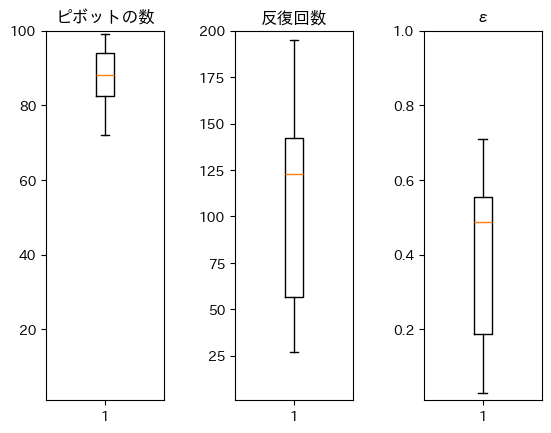

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].set_title(f"ピボットの数")
axs[0].set_ylim(1, 100)
axs[0].boxplot(list(gdf["params_pivots"]))
axs[1].set_ylim(1, 200)
axs[1].set_title(f"反復回数")
axs[1].boxplot(list(gdf["params_iterations"]))
axs[2].set_ylim(0.01, 1)
axs[2].set_title(f"ε")
axs[2].boxplot(list(gdf["params_eps"]))
fig.subplots_adjust(wspace=0.6)
fig.show()